# Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from datetime import datetime, timedelta
import random

In [2]:
# listing all the csv files
!ls *.csv

friday.csv    monday.csv    thursday.csv  tuesday.csv   wednesday.csv


## Monday

In [3]:
monday=pd.read_csv('monday.csv', sep = ';', parse_dates=['timestamp'])

In [4]:
monday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    4884 non-null   datetime64[ns]
 1   customer_no  4884 non-null   int64         
 2   location     4884 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 114.6+ KB


In [5]:
monday.isna().sum().sum()

0

### Find customers not checked out

In [6]:
monday['last_location']=monday.groupby('customer_no')['location'].transform('last')
#monday.head(2)

In [7]:
#check to see who hasn't been checked out
monday.groupby('last_location')['customer_no'].count()

last_location
checkout    4861
dairy          7
fruit         11
spices         5
Name: customer_no, dtype: int64

In [8]:
m_not_checkedout=monday[monday['last_location']!='checkout']
#m_not_checkedout

In [9]:
mnco=m_not_checkedout['customer_no'].unique()
mnco

array([1430, 1433, 1437, 1439, 1440, 1441, 1443, 1445, 1446, 1447])

In [10]:
mnco_list = mnco.tolist()
print(f'List: {mnco_list}')

List: [1430, 1433, 1437, 1439, 1440, 1441, 1443, 1445, 1446, 1447]


In [11]:
for i in mnco_list: 
    monday=monday.append({'timestamp': '2019-09-02 21:50:00',
                  'customer_no': i,
                  'location': 'checkout',
                  'day':'Monday',
                  'last_location': 'checkout'}, ignore_index=True)

In [12]:
for i in mnco_list:
    monday.loc[monday["customer_no"] == i, "last_location"] = 'checkout'

### Data Cleanup

In [13]:
monday['timestamp'].astype(str)

0       2019-09-02 07:03:00
1       2019-09-02 07:03:00
2       2019-09-02 07:04:00
3       2019-09-02 07:04:00
4       2019-09-02 07:04:00
               ...         
4889    2019-09-02 21:50:00
4890    2019-09-02 21:50:00
4891    2019-09-02 21:50:00
4892    2019-09-02 21:50:00
4893    2019-09-02 21:50:00
Name: timestamp, Length: 4894, dtype: object

In [14]:
monday['timestamp'] = pd.to_datetime(monday['timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [15]:
#extract day, hour and minutes, might need to calculate length of time spent
monday['day']=monday['timestamp'].dt.day_name()
monday['hour']=monday['timestamp'].dt.hour

In [16]:
monday['hour']=monday['hour'].astype('int64')

In [17]:
#make a unique identifier for customers on Monday as client numbers repeat each day
monday['unique_id']=monday['customer_no'].astype(str)+monday['day']

In [18]:
monday.head(2)

,timestamp,customer_no,location,last_location,day,hour,unique_id
0,2019-09-02 07:03:00,1,dairy,checkout,Monday,7,1Monday
1,2019-09-02 07:03:00,2,dairy,checkout,Monday,7,2Monday


### Checks on Checkout data

In [19]:
c1447=monday[monday['customer_no']==1447]
c1447

,timestamp,customer_no,location,last_location,day,hour,unique_id
4883,2019-09-02 21:50:00,1447,fruit,checkout,Monday,21,1447Monday
4893,2019-09-02 21:50:00,1447,checkout,checkout,Monday,21,1447Monday


In [20]:
c526=monday[monday['customer_no']==526]
c526

,timestamp,customer_no,location,last_location,day,hour,unique_id
1750,2019-09-02 13:04:00,526,fruit,checkout,Monday,13,526Monday
1756,2019-09-02 13:06:00,526,dairy,checkout,Monday,13,526Monday
1764,2019-09-02 13:07:00,526,drinks,checkout,Monday,13,526Monday
1770,2019-09-02 13:08:00,526,spices,checkout,Monday,13,526Monday
1773,2019-09-02 13:09:00,526,fruit,checkout,Monday,13,526Monday
1785,2019-09-02 13:11:00,526,spices,checkout,Monday,13,526Monday
1792,2019-09-02 13:12:00,526,drinks,checkout,Monday,13,526Monday
1805,2019-09-02 13:14:00,526,spices,checkout,Monday,13,526Monday
1811,2019-09-02 13:15:00,526,dairy,checkout,Monday,13,526Monday
1832,2019-09-02 13:17:00,526,fruit,checkout,Monday,13,526Monday


# EDA

In [21]:
c_sec_m=monday.groupby('location').count()
c_sec_m

,timestamp,customer_no,last_location,day,hour,unique_id
location,,,,,,
checkout,1447,1447,1447,1447,1447,1447
dairy,895,895,895,895,895,895
drinks,797,797,797,797,797,797
fruit,1005,1005,1005,1005,1005,1005
spices,750,750,750,750,750,750


In [22]:
location_list=list(monday['location'].unique())
location_list

['dairy', 'spices', 'fruit', 'checkout', 'drinks']

Text(0, 0.5, 'Number of Customers')

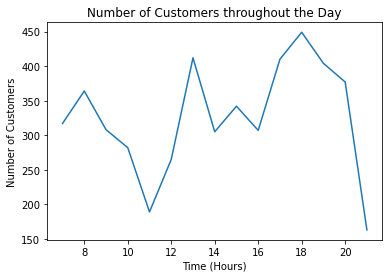

In [23]:
monday.groupby(monday['hour'])['customer_no'].count().plot()
plt.title('Number of Customers throughout the Day')
plt.xlabel('Time (Hours)')
plt.ylabel('Number of Customers')

Text(0.5, 0, 'Section')

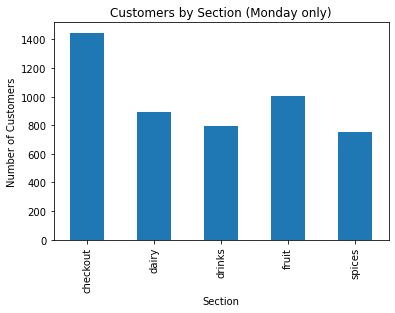

In [24]:
monday.groupby(['location'])['customer_no'].count().plot.bar()
plt.title('Customers by Section (Monday only)')
plt.ylabel('Number of Customers')
plt.xlabel('Section')

<AxesSubplot:xlabel='location'>

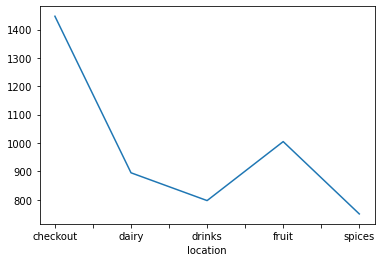

In [25]:
monday.groupby('location')['customer_no'].count().plot()

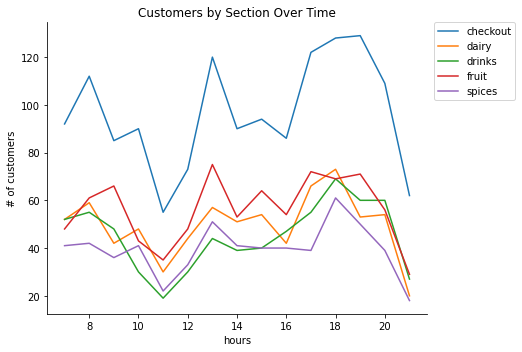

In [26]:
# Number of customers in each section over time
c_time=pd.DataFrame(monday.groupby(['location','hour'])['customer_no'].nunique())
p=sns.relplot(data=c_time, x='hour', y='customer_no', hue='location', kind='line')
plt.ylabel('# of customers')
plt.xlabel('hours')
plt.title('Customers by Section Over Time')
plt.plot(figsize=(20, 10))
plt.tight_layout()
p._legend.remove()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [27]:
c_time.head(2)

customer_no
location hour             
checkout 7              92
         8             112

<AxesSubplot:title={'center':'Total Customers in each Section on Monday'}, xlabel='location', ylabel='count'>

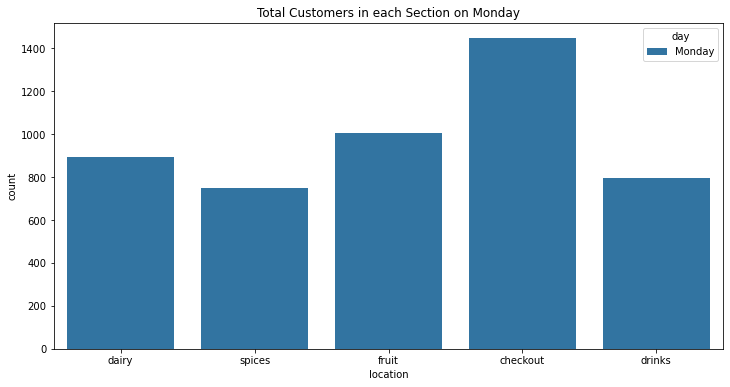

In [28]:
plt.figure(figsize=(12, 6))
plt.title('Total Customers in each Section on Monday')
sns.countplot(x=monday['location'],hue = monday.day)

In [29]:
customers_checkout_m=monday[monday['location']=='checkout']
customers_checkout_m.head(2)

,timestamp,customer_no,location,last_location,day,hour,unique_id
8,2019-09-02 07:05:00,1,checkout,checkout,Monday,7,1Monday
9,2019-09-02 07:05:00,5,checkout,checkout,Monday,7,5Monday


[]

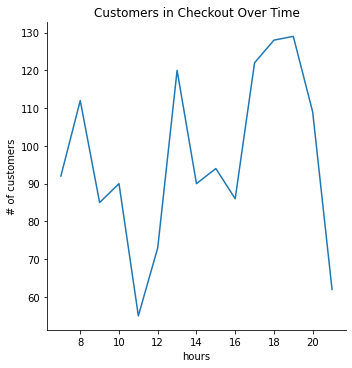

In [30]:
ch_time=pd.DataFrame(customers_checkout_m.groupby('hour')['customer_no'].nunique())
sns.relplot(data=ch_time, x='hour', y='customer_no', kind='line')
plt.ylabel('# of customers')
plt.xlabel('hours')
plt.title('Customers in Checkout Over Time')
plt.plot(figsize=(20, 10))


In [31]:
#Calculate the time each customer spent in the market

In [32]:
cust_no_sorted=monday.sort_values('customer_no')#.reset_index()
cust_no_sorted.head(2)

,timestamp,customer_no,location,last_location,day,hour,unique_id
0,2019-09-02 07:03:00,1,dairy,checkout,Monday,7,1Monday
8,2019-09-02 07:05:00,1,checkout,checkout,Monday,7,1Monday


In [33]:
cust_no_sorted['time_spent']=cust_no_sorted.sort_values(['customer_no','timestamp']).groupby('customer_no')['timestamp'].diff()


In [34]:
time_spent_m=cust_no_sorted[cust_no_sorted['time_spent'].notnull()]

In [35]:
#Calculate the time each customer spent in the market
ts_inmkt_m=time_spent_m[['customer_no','time_spent']]
ts_inmkt_m.head(2)

,customer_no,time_spent
8,1,0 days 00:02:00
12,2,0 days 00:03:00


In [36]:
ts=pd.DataFrame(ts_inmkt_m.groupby('time_spent')['customer_no'].count())

[]

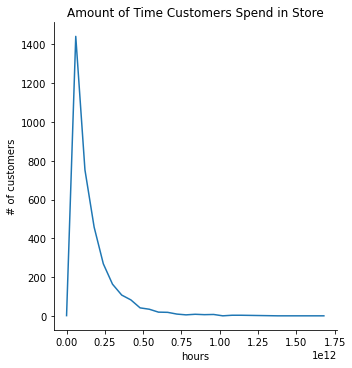

In [37]:
sns.relplot(data=ts, x='time_spent', y='customer_no', kind='line')
plt.ylabel('# of customers')
plt.xlabel('hours')
plt.title('Amount of Time Customers Spend in Store')
plt.plot(figsize=(20, 10))

### Customers in Store Throughout the Day


[]

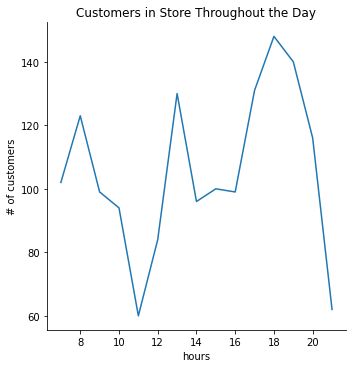

In [38]:
total=pd.DataFrame(monday.groupby('hour')['customer_no'].nunique())
sns.relplot(data=total, x="hour", y="customer_no", kind="line")
plt.ylabel('# of customers')
plt.xlabel('hours')
plt.title('Customers in Store Throughout the Day')
plt.plot(figsize=(20, 10))

In [39]:
monday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      4894 non-null   datetime64[ns]
 1   customer_no    4894 non-null   int64         
 2   location       4894 non-null   object        
 3   last_location  4894 non-null   object        
 4   day            4894 non-null   object        
 5   hour           4894 non-null   int64         
 6   unique_id      4894 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 267.8+ KB


In [40]:
monday.set_index('timestamp', inplace=True)

In [41]:
monday.index.dtype

dtype('<M8[ns]')

In [42]:
type(monday.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
monday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4894 entries, 2019-09-02 07:03:00 to 2019-09-02 21:50:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_no    4894 non-null   int64 
 1   location       4894 non-null   object
 2   last_location  4894 non-null   object
 3   day            4894 non-null   object
 4   hour           4894 non-null   int64 
 5   unique_id      4894 non-null   object
dtypes: int64(2), object(4)
memory usage: 267.6+ KB


Text(0.5, 1.0, 'Customers in Store Throughout the Day')

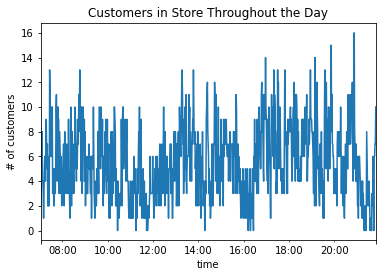

In [44]:
monday.resample('min')['customer_no'].nunique().plot()
plt.ylabel('# of customers')
plt.xlabel('time')
plt.title('Customers in Store Throughout the Day')

Text(0.5, 1.0, 'Customers in Store Throughout the Day (increments of 5 min)')

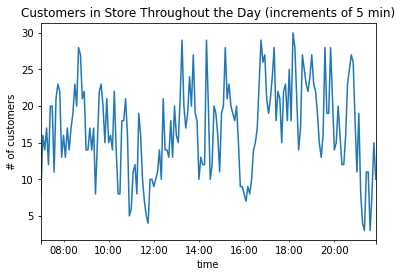

In [45]:
monday.resample("5T").nunique()["customer_no"].plot()
plt.ylabel('# of customers')
plt.xlabel('time')
plt.title('Customers in Store Throughout the Day (increments of 5 min)')

In [46]:
#monday.head()

# Calculate Transition Probabilities
                    a 5x5 matrix

In [47]:
monday.columns

Index(['customer_no', 'location', 'last_location', 'day', 'hour', 'unique_id'], dtype='object')

In [48]:
monday.head(2)

,customer_no,location,last_location,day,hour,unique_id
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,checkout,Monday,7,1Monday
2019-09-02 07:03:00,2,dairy,checkout,Monday,7,2Monday


In [49]:
#resample by minute
#Interpolation is used to estimate unknown data points between two known data points
df1 = monday.groupby('customer_no').apply(lambda x : #x.set_index('timestamp')
                                            x.resample('1Min')
                                            .first()
                                            .interpolate()
                                            .ffill()).reset_index(level=0, drop=True).reset_index()



In [50]:
df1.head()

,timestamp,customer_no,location,last_location,day,hour,unique_id
0,2019-09-02 07:03:00,1.0,dairy,checkout,Monday,7.0,1Monday
1,2019-09-02 07:04:00,1.0,dairy,checkout,Monday,7.0,1Monday
2,2019-09-02 07:05:00,1.0,checkout,checkout,Monday,7.0,1Monday
3,2019-09-02 07:03:00,2.0,dairy,checkout,Monday,7.0,2Monday
4,2019-09-02 07:04:00,2.0,dairy,checkout,Monday,7.0,2Monday


In [51]:
#create new column 'next_location' and shift
df1['next_location']=df1['location'].shift(-1)

In [52]:
#to change all the customers at checkout as the next location is exit
df1.loc[df1["location"] == 'checkout', "next_location"] = 'checkout'

In [53]:
#to extract the current location and the next location
locations=df1[['location', 'next_location']]
locations.head(2)

,location,next_location
0,dairy,dairy
1,dairy,checkout


In [67]:
#calculate the probabilities
transition_matrix=pd.crosstab(locations['location'], locations['next_location'], normalize=0)

In [72]:
transition_matrix.index

Index(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], dtype='object', name='location')

In [56]:
#to check that all rows sum up to 1
transition_matrix.sum(axis=1)

location
checkout    1.0
dairy       1.0
drinks      1.0
fruit       1.0
spices      1.0
dtype: float64

In [73]:
#Convert transition matrix to numpy array
TM = transition_matrix.to_numpy()
TM

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.0894797 , 0.74413951, 0.06232133, 0.05174385, 0.05231561],
       [0.20810943, 0.01123596, 0.61064973, 0.09086468, 0.07914021],
       [0.20585938, 0.08789062, 0.05078125, 0.6078125 , 0.04765625],
       [0.14576547, 0.19136808, 0.1767101 , 0.09690554, 0.38925081]])

# Implement a Customer Class using the transition matrix

In [58]:
# Actual Simulation
class Customer:
    def __init__(self, name, state, transition_mat):
        self.name = name
        self.state = state
        self.transition_mat = transition_mat
        
      
    def __repr__(self):
        return f'<Customer {self.id} in {self.state}>'
      

    def is_active(self):
        if self.state != 'checkout':
            return True
        else:
            return False

    def next_state(self):
        transition_mat = self.transition_mat
        next_state = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']
        if self.state == 'checkout':
                return 'customer has left'
        else:
            while self.state != 'checkout':
                if self.state == 'dairy':
                    self.state = np.random.choice(next_state, p=transition_mat[1])
                    print(self.state)
                elif self.state == 'drinks':
                    self.state = np.random.choice(next_state, p=transition_mat[2])
                    print(self.state)
                elif self.state == 'fruit':
                    self.state = np.random.choice(next_state, p=transition_mat[3])
                    print(self.state)
                else:
                    self.state = np.random.choice(next_state, p=transition_mat[4])
                    print(self.state)
            else:
                return 'customer has left'

In [59]:
#For customer 1
cust1 = Customer('Jake', 'dairy', TM)
cust1.next_state()

dairy
dairy
dairy
spices
dairy
dairy
checkout


'customer has left'

In [60]:
cust2=Customer("Margaret", "spices",TM)
cust2.next_state()

fruit
spices
spices
dairy
dairy
spices
drinks
checkout


'customer has left'

In [61]:
cust3 = Customer('Thomas', 'drinks', TM)
cust3.next_state()


drinks
drinks
drinks
drinks
spices
drinks
fruit
fruit
spices
checkout


'customer has left'

In [62]:
cust4 = Customer('Lilly', 'dairy', TM)
cust4.next_state()
cust4.is_active()

drinks
spices
spices
spices
spices
spices
checkout


False

In [63]:
cust5 = Customer('Charlotte', 'dairy', TM)
cust5.next_state()

dairy
dairy
checkout


'customer has left'